In [14]:
# Original Dataset: https://www.cs.toronto.edu/~kriz/cifar.html for more information
# Load of necessary libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.layers.convolutional import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from tensorflow.keras.utils import to_categorical
# to make the example replicable
np.random.seed(42)
# Load of the dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [15]:
X_train.shape, Y_train.shape

((50000, 32, 32, 3), (50000, 1))

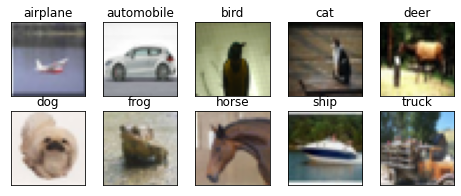

In [16]:
import matplotlib.pyplot as plt
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(len(class_names)):
  ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
  idx = np.where(Y_train[:]==i)[0]
  features_idx = X_train[idx,::]
  img_num = np.random.randint(features_idx.shape[0])
  im = features_idx[img_num,::]
  ax.set_title(class_names[i])
  #im = np.transpose(features_idx[img_num,::], (1, 2, 0))
  plt.imshow(im)
plt.show()

## Demonstrating that not preprocessing the data can lead to poor model performance

In [10]:
'''
# Initializing the model
model = Sequential()
# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# We add our classificator
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])
# Training of the model
model.fit(X_train, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test, to_categorical(Y_test)))
# Evaluation of the model
scores = model.evaluate(X_test, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])
'''

"\n# Initializing the model\nmodel = Sequential()\n# Defining a convolutional layer\nmodel.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))\n# Defining a second convolutional layer\nmodel.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))\n# Defining a third convolutional layer\nmodel.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))\n# We add our classificator\nmodel.add(Flatten())\nmodel.add(Dense(1024, activation='relu'))\nmodel.add(Dense(10, activation='softmax'))\n# Compiling the model\nmodel.compile(loss='categorical_crossentropy',\n              optimizer=Adam(learning_rate=0.0001, decay=1e-6),\n              metrics=['accuracy'])\n# Training of the model\nmodel.fit(X_train, to_categorical(Y_train),\n          batch_size=128,\n          shuffle=True,\n          epochs=10,\n          validation_data=(X_test, to_categorical(Y_test)))\n# Evaluation of the model\nscores = model.evaluate(X_test, to_categorical(Y_test))\nprint('Loss: %.3f' % 

# Data Preprocessing
## To carry out this pre-processing, two things are usually done:
- **Center the data**: calculate the average of the dataset and subtract it. When working with images, you can either calculate the entire average of the dataset and subtract it directly, or you can calculate the average of each channel of the image and subtract it from each channel.
- **Normalize the data**: this is done to get all the data to have approximately the same scale. 

## The two most common ways to do Normalization are
- 1) **Divide each dimension by its standard deviation**, after the data has been centered (subtracted the mean)
- 2) **Normalize so that the minimum and maximum of each dimension are -1 and 1.** This only makes sense if we start from data with different scales but that we know should be similar, that is, that they have a similar importance for the algorithm. In the case of images, we know that the values that can be taken are from 0 to 255, so it is not strictly necessary to normalize since the values are already on a similar scale.

In [17]:
# Cenetering the data
X_train_mean = np.mean(X_train, axis = 0)
X_train_cent = X_train - X_train_mean
# Normalization
X_train_std = np.std(X_train, axis = 0)
X_train_norm = X_train_cent / X_train_std

## 3 Types of sets for the model
1. **Training Set**: to update the weights for each batch
2. **Validation Set**: it checks the generalization capacity of the network in each period. It tests the models with samples that have not been seen during the training, it serves to monitor the training of the network for information purposes, but it does not intervene in any calculation! It is usually used when you want to adjust the parameters, this set being the one that indicates which parameters are best to use. The more accurate the validation, the better the set of parameters we have. For this reason, we cannot rely on this result to give us an idea of the network’s generalization capacity, because we have chosen the network configuration to give us a higher accuracy. Therefore, we must have an extra set that allows us, now, to say if our network is good with samples that I have never seen or not: the test one.
3. **Test Set**: it gives us an intuition of how good our network is by generalizing with a set (larger than the validation set) never seen.

In [18]:
# preparing test set
X_test_norm = (X_test - X_train_mean) / X_train_std

# Creating the same Conv Model but with the preprocessed data

In [13]:
# Initializing the model
model = Sequential()
# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# We add our classificator
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])
# Training of the model
model.fit(X_train, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test, to_categorical(Y_test)))
# Evaluation of the model
scores = model.evaluate(X_test, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Epoch 1/10


KeyboardInterrupt: 

## Reducing overfitting via BatchNormalization (Internal Covariate Shift)

### What it is

- Internal Covariate Shift is defined as the change in the distribution of network activations due to the different distribution of input data between mini-batches. The lesser this difference between mini-batches, the more similar the data that reaches the network filters, the more similar the activation maps will be, and the better the network training will work.

### How it works

- This is achieved by forcing the network activations to have a chosen value of a unitary Gaussian distribution at the beginning of the training. This process is possible because normalization is a distinguishable operation.

In [ ]:
model.add(Conv2D(128, kernel_size=(3, 3), input_shape=(32, 32, 3))
model.add(BatchNormalization())
# normally inserted just before the activation function is executed:
model.add(Activation('relu'))

In [ ]:
# We Import Batch Normalizarion layer
from keras.layers import BatchNormalization, Activation
# Inizializting the model
model = Sequential()
# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Defining a thirdd convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
# We include our classifier
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])
# Training the model
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test))) # aquí deberíamos usar un conjunto distinto al de test!!!
# Evaluating the model
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

# Improve the Model via Regularization
- Regularization consists of penalizing in some way the predictions made by our network during training so that it does not think that the training set is the absolute truth and thus knows how to better generalize when it sees other datasets.
- In the end, **it is much better to have a net with many layers and apply regularization, than to have a small one to avoid overfitting. This is because small networks are simpler functions that have less local minimums, so the gradient descent reaches one or another depending a lot on the initialization, so the losses achieved usually have a great variance depending on the initialization.**
- However, networks with many layers are much more complicated functions with many more local minima that, although they are more difficult to reach, usually have all similar and better losses.

In [19]:
from keras.regularizers import l1, l2, l1_l2
k_regs = []

k_regs.extend([l1(10**i) for i in range(-3,0)])
k_regs.extend([l2(10**i) for i in range(-3,0)])
k_regs.extend([l1_l2(10**i) for i in range(-3,0)])

print(k_regs)
k_cons = []

[<keras.regularizers.L1 object at 0x7fe9046975e0>, <keras.regularizers.L1 object at 0x7fe904697e20>, <keras.regularizers.L1 object at 0x7fe904697a30>, <keras.regularizers.L2 object at 0x7fe904697760>, <keras.regularizers.L2 object at 0x7fe904697610>, <keras.regularizers.L2 object at 0x7fe904697d60>, <keras.regularizers.L1L2 object at 0x7fe904697cd0>, <keras.regularizers.L1L2 object at 0x7fe904697c70>, <keras.regularizers.L1L2 object at 0x7fe8ecea3e50>]


In [ ]:
def get_CNN_acc(k_regularizer=None, k_constraint=None):
    # L1 Regularization
    # Regularizer layer import
    from keras.regularizers import l1
    # Inizializing the model
    model = Sequential()
    # Defining a convolutional layer
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
    # Defining a second convolutional layer
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    # Defining a third convolutional layer
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    # Classifier inclusion
    model.add(Flatten())
    model.add(Dense(1024, activation='relu', kernel_regularizer=k_regularizer, kernel_constraint=k_constraint))
    model.add(Dense(10, activation='softmax'))
    # Compiling the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=0.0001, decay=1e-6),
                  metrics=['accuracy'])
    # Traning the model
    model.fit(X_train_norm, to_categorical(Y_train),
              batch_size=128,
              shuffle=True,
              epochs=10,
              validation_data=(X_test_norm, to_categorical(Y_test)))
    # Evaluating the model
    scores = model.evaluate(X_test_norm, to_categorical(Y_test))
    print('Loss: %.3f' % scores[0])
    print('Accuracy: %.3f' % scores[1])
    
    return scores
# default value used is l1=0.01.
# kernel_regularizer, kernel_constraint = None

# L2 regularization (Lasso regularization)
- It consists of penalizing the loss function by adding the term 1/2 * λ* W**2 for each weight, which results in:
- The 1/2 is simply for convenience when calculating the derivatives, as this leaves λ* W instead of 2*λ* W.
- What this means is that **we penalize very high or disparate weights, and prefer them to be all of a similar magnitude. If you remember, what the weights imply is the importance of each neuron in the final calculation of the prediction. Therefore, by doing this, we get all the neurons to matter more or less equally, that is, the network will use all its neurons to make the prediction.**
- On the contrary, if there were very high weights for certain neurons, the calculation of the prediction would take them much more into account, so we would end up with a network with dead neurons that are useless.
- Moreover, introducing the term 1/2 * λ* W**2 in our loss function make our weights to approximate to zero during the gradient descent. With a linear decay of W+=-λ⋅W.

In [ ]:
# L2 Regularization
# Regularizer layer import
from keras.regularizers import l2
# Inizializing the model
model = Sequential()
# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Classifier inclusion
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(10, activation='softmax'))
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])
# Traning the model
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test)))
# Evaluating the model
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

# L1 regularization (Ridge regularization)

In [ ]:
# L1 Regularization
# Regularizer layer import
from keras.regularizers import l1
# Inizializing the model
model = Sequential()
# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Classifier inclusion
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(10, activation='softmax'))
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])
# Traning the model
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test)))
# Evaluating the model
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

# reusable function

# Elastic Net Regularization (L1 + L2)

In [ ]:
# Elastic Net Regularization (L1 + L2)
# Regularizer layer import
from keras.regularizers import l1_l2
# Inizializing the model
model = Sequential()
# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Classifier inclusion
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=l1_l2(0.01, 0.01)))
model.add(Dense(10, activation='softmax'))
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])
# Traning the model
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test)))
# Evaluating the model
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1]


# Max norm constraints

In [ ]:
# Elastic Net Regularization (L1 + L2)
# Regularizer layer import
from keras.constraints import max_norm
# Inizializing the model
model = Sequential()
# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Classifier inclusion
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_costraint=max_norm(3.)))
model.add(Dense(10, activation='softmax'))
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])
# Traning the model
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test)))
# Evaluating the model
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

# Dropout Regularization

In [ ]:
# Dropout
# Dropout layer import
from keras.layers import Dropout
# Inizializing the model
model = Sequential()
# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(0.25))
# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))
# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))
# Classifier inclusion
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])
# Traning the model
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test)))
# Evaluating the model
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

# Max norm + Dropout

In [ ]:
# Dropout & Max Norm
# Dropout & Max Norm layers import
from keras.layers import Dropout
from keras.constraints import max_norm
# Inizializing the model
model = Sequential()
# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(0.25))
# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))
# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))
# Classifier inclusion
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_constraint=max_norm(3.)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])
# Traning the model
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test)))
# Evaluating the model
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])